In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



In [2]:
food_group_1 = pd.read_csv("FOOD-DATA-GROUP1.csv")
food_group_2 = pd.read_csv("FOOD-DATA-GROUP2.csv")
food_group_3 = pd.read_csv("FOOD-DATA-GROUP3.csv")
food_group_4 = pd.read_csv("FOOD-DATA-GROUP4.csv")
food_group_5 = pd.read_csv("FOOD-DATA-GROUP5.csv")

In [3]:
data = pd.concat([food_group_1, food_group_2, food_group_3, food_group_4, food_group_5],
                      ignore_index= True)

cols_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']

data.drop(cols_to_drop, axis = 1, inplace = True)

In [4]:
data = data[~((data['Nutrition Density'] >= 400) 
       & (data['food'].str.contains('cheese', case = False)))] 
data = data[data['Nutrition Density'] < 500]

In [5]:
data = data[data['Caloric Value'] <= 900]

In [6]:
total_NAs = data.isna().sum().sum()

print(f"Total number of NAs in dataset: {total_NAs}")

Total number of NAs in dataset: 0


In [7]:
print(f"Number of Unique food items: {data['food'].nunique()}")
print(f"Dataset Dimension: \n {data.shape}")

Number of Unique food items: 2269
Dataset Dimension: 
 (2269, 35)


In [8]:
print(f"Dataset datatypes: \n {data.dtypes}")

Dataset datatypes: 
 food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganese               float64
Phosphorus         

In [9]:
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [10]:
# Standardizing all values to grams
cols_in_mg = ['Cholesterol', 'Vitamin A' , 'Vitamin B1', 'Vitamin B12',
              'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
              'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium',
              'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium',
              'Selenium', 'Zinc']

data[cols_in_mg] = data[cols_in_mg].apply(lambda x: x/1000)

In [11]:
data = data[(data.iloc[: ,2:34] <= 100).all(axis =1)]

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,1454.0,126.160935,141.887746,0.0,27.250000,8.200000e+01,164.000000,863.0000
Fat,1454.0,5.813838,9.773956,0.0,0.200000,2.000000e+00,7.975000,95.5000
Saturated Fats,1454.0,1.942630,4.223793,0.0,0.064000,5.000000e-01,2.200000,80.0000
Monounsaturated Fats,1454.0,2.652829,5.707170,0.0,0.066000,6.000000e-01,2.800000,99.9000
Polyunsaturated Fats,1454.0,1.493107,3.609429,0.0,0.063000,3.500000e-01,1.500000,51.3000
Carbohydrates,1454.0,12.041809,17.976722,0.0,0.400000,3.900000e+00,17.175000,99.6000
Sugars,1454.0,2.616782,7.615598,0.0,0.000000,6.800000e-02,1.700000,85.2000
Protein,1454.0,5.865474,9.109188,0.0,0.300000,2.300000e+00,6.600000,65.5000
Dietary Fiber,1454.0,1.290521,3.755628,0.0,0.000000,1.000000e-01,1.200000,76.5000
Cholesterol,1454.0,0.021261,0.056157,0.0,0.000000,0.000000e+00,0.017925,0.6720


## Target Variable - Nutrition Density Analysis

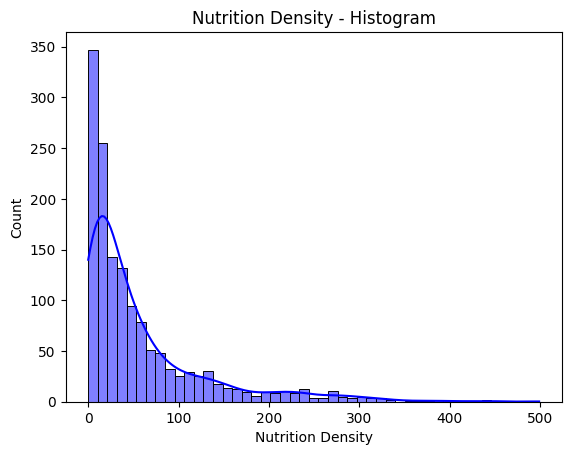

In [13]:
sns.histplot(data['Nutrition Density'], kde = True, color = 'blue')
plt.title('Nutrition Density - Histogram')
plt.show()

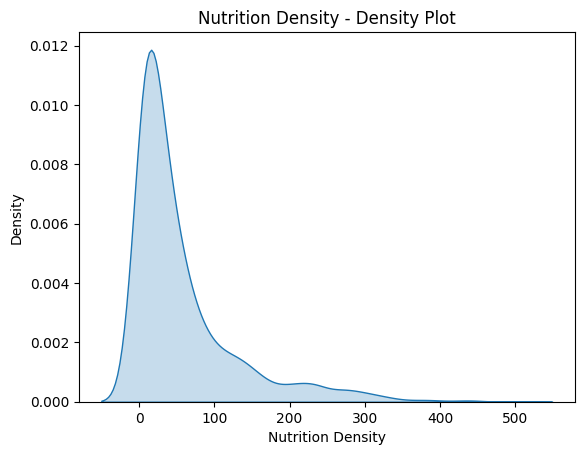

In [14]:
sns.kdeplot(data['Nutrition Density'], fill = True)
plt.title('Nutrition Density - Density Plot')
plt.show()

In [15]:
fig = px.box(data, x = data['Nutrition Density'], hover_name = 'food')
fig.show()

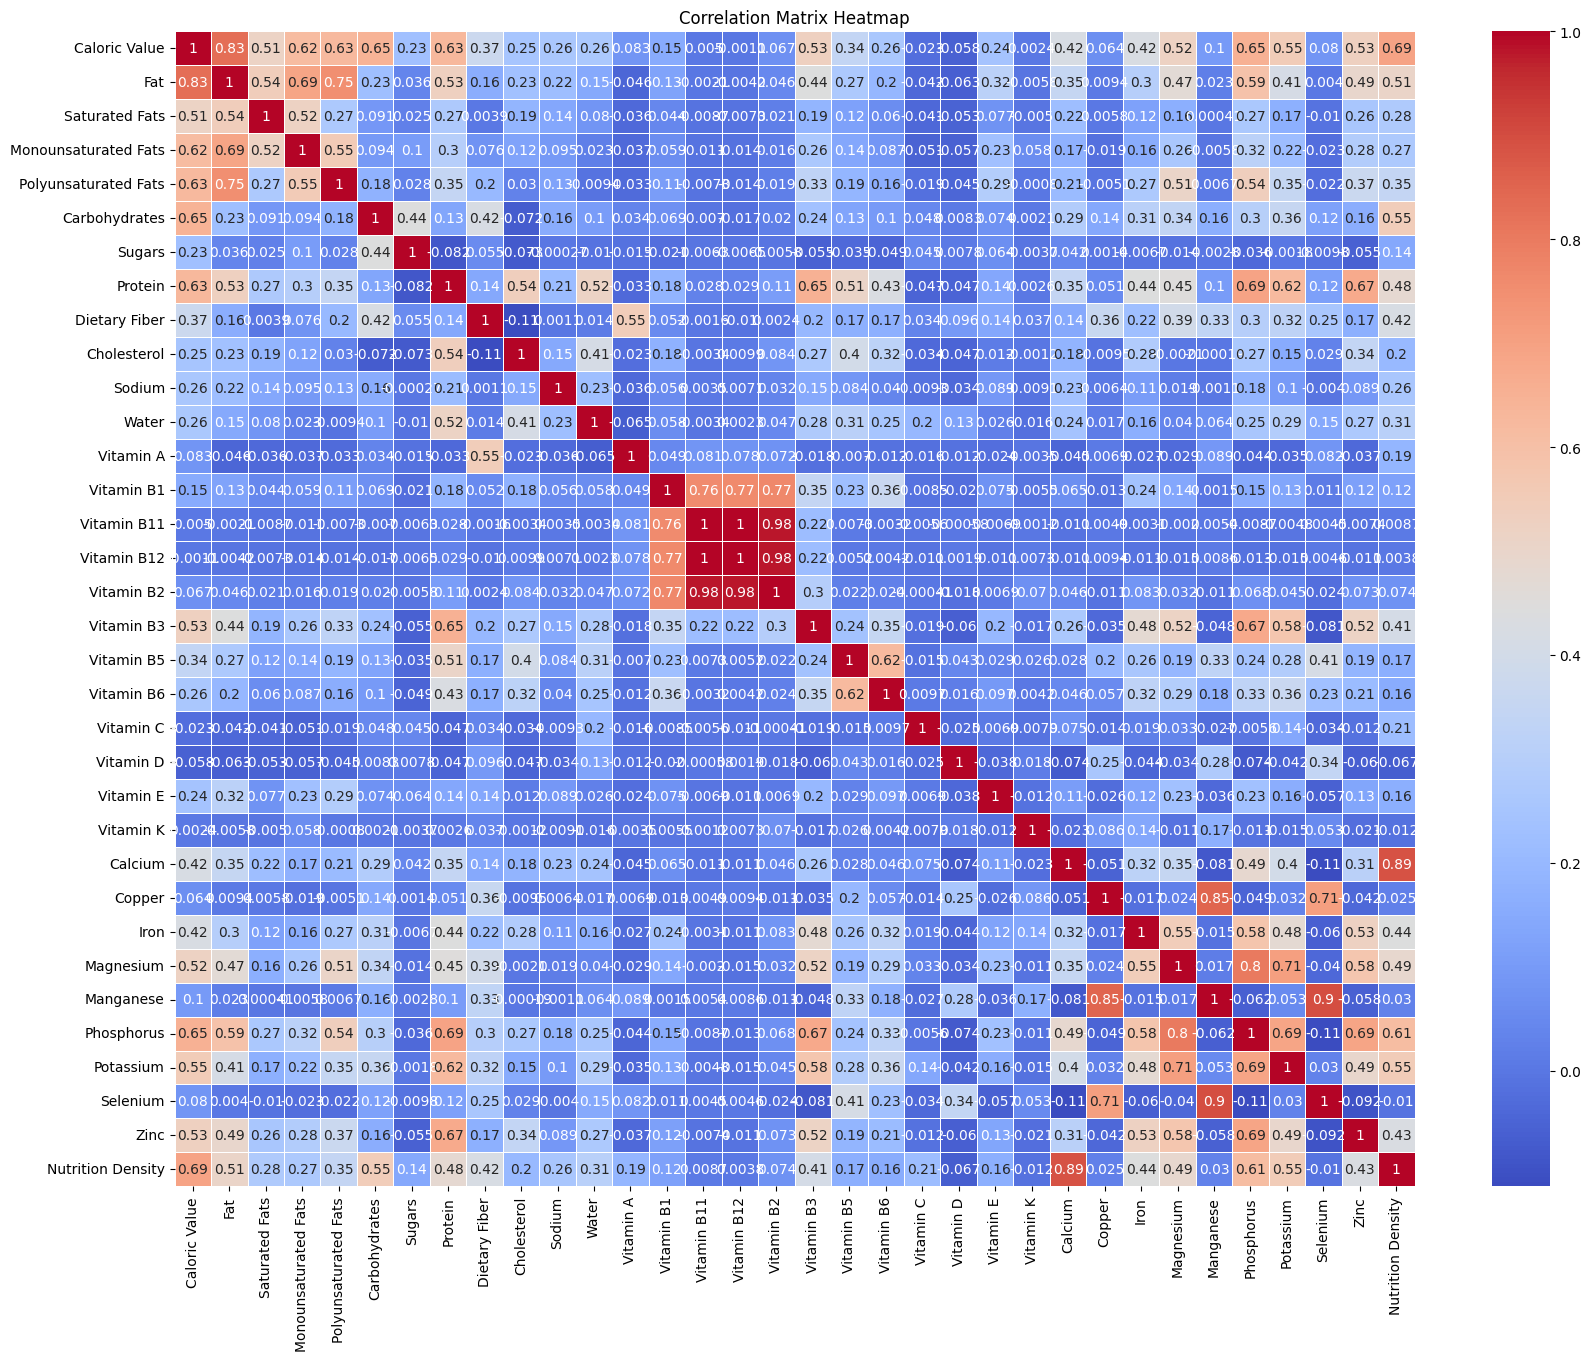

In [16]:
corr_matrix = data.iloc[:, 1:].corr()

plt.figure(figsize = (20,15))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("Correlation Matrix Heatmap")


plt.show()

In [17]:
sorted_corr_nd = corr_matrix['Nutrition Density'].sort_values(ascending = False)
top_corr_nd = sorted_corr_nd[1:9]
top_corr_nd = top_corr_nd.index.tolist()

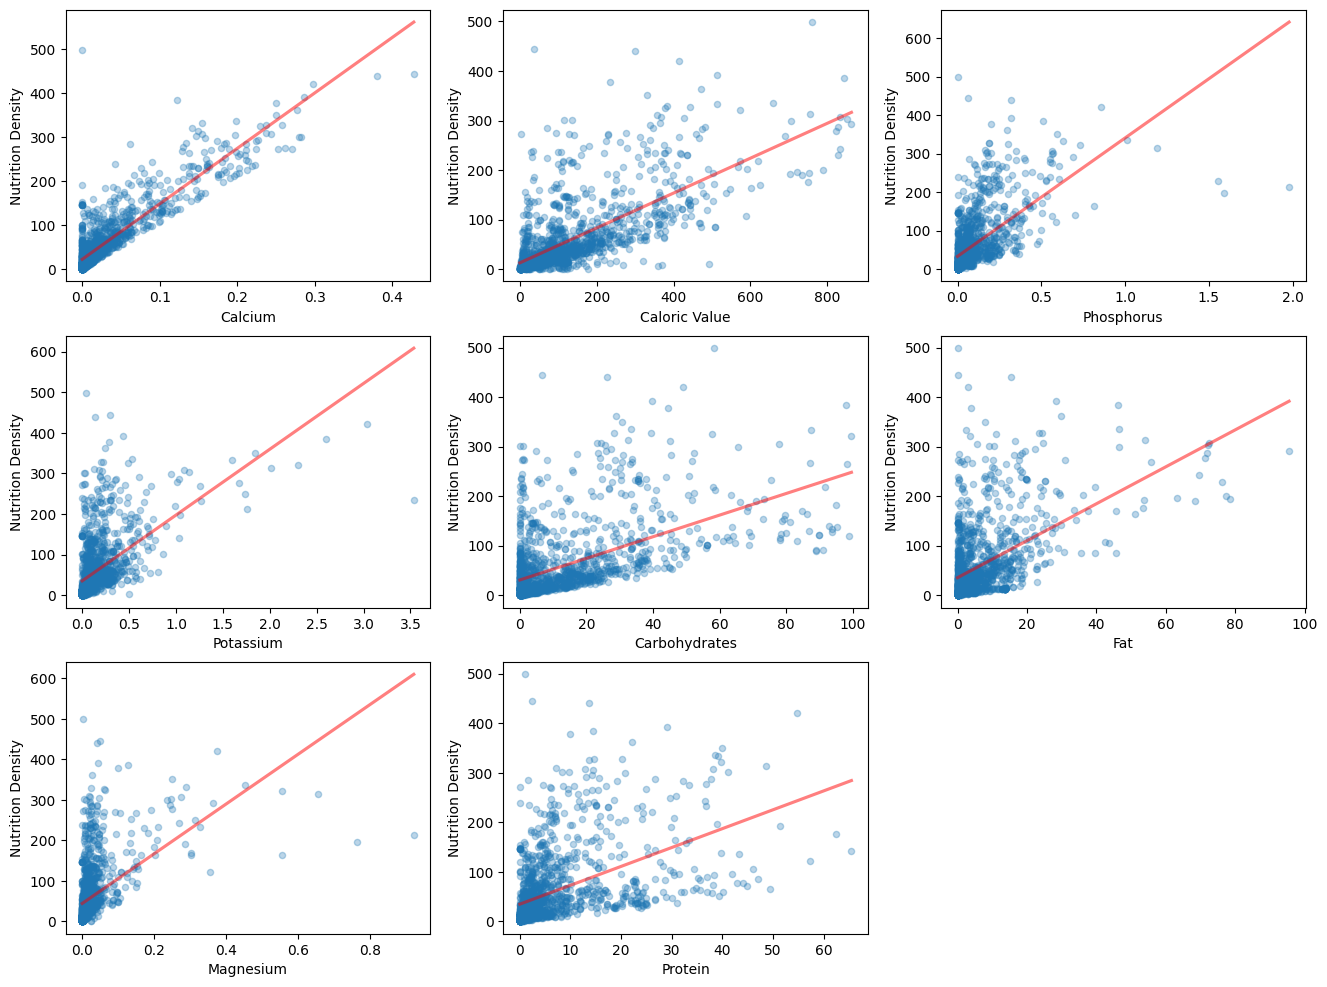

In [18]:
plt.figure(figsize=(16,12))
for i, nutrient in enumerate(top_corr_nd):
    plt.subplot(3,3,i+1)
    sns.regplot(data = data, x = nutrient, y ='Nutrition Density',
                ci = None, scatter_kws = {"s" : 20, "alpha" : 0.3}, 
                line_kws = {"color" : "red", "alpha" : 0.5})
plt.show()

## Macronutrient Analysis

In [19]:
macro_cols = ['Caloric Value', 'Fat', 'Protein', 'Carbohydrates']
macro_data = data.loc[:, macro_cols]

In [20]:
fig = px.box(data, x = 'Caloric Value', hover_name = 'food')
fig.update_layout(title = 'Caloric Value Box Plot',
                  width = 700, height = 500)
fig.show()

In [21]:
fig = px.box(data, x = 'Fat', hover_name = 'food')
fig.update_layout(title = 'Fat Box Plot',
                  width = 700, height = 500)
fig.show()

In [22]:
fig = px.box(data, x = 'Protein', hover_name = 'food')
fig.update_layout(title = 'Protein Box Plot',
                  width = 700, height = 500)
fig.show()

In [23]:
fig = px.box(data, x = 'Carbohydrates', hover_name = 'food')
fig.update_layout(title = 'Carbohydrates Box Plot',
                  width = 700, height = 500)
fig.show()

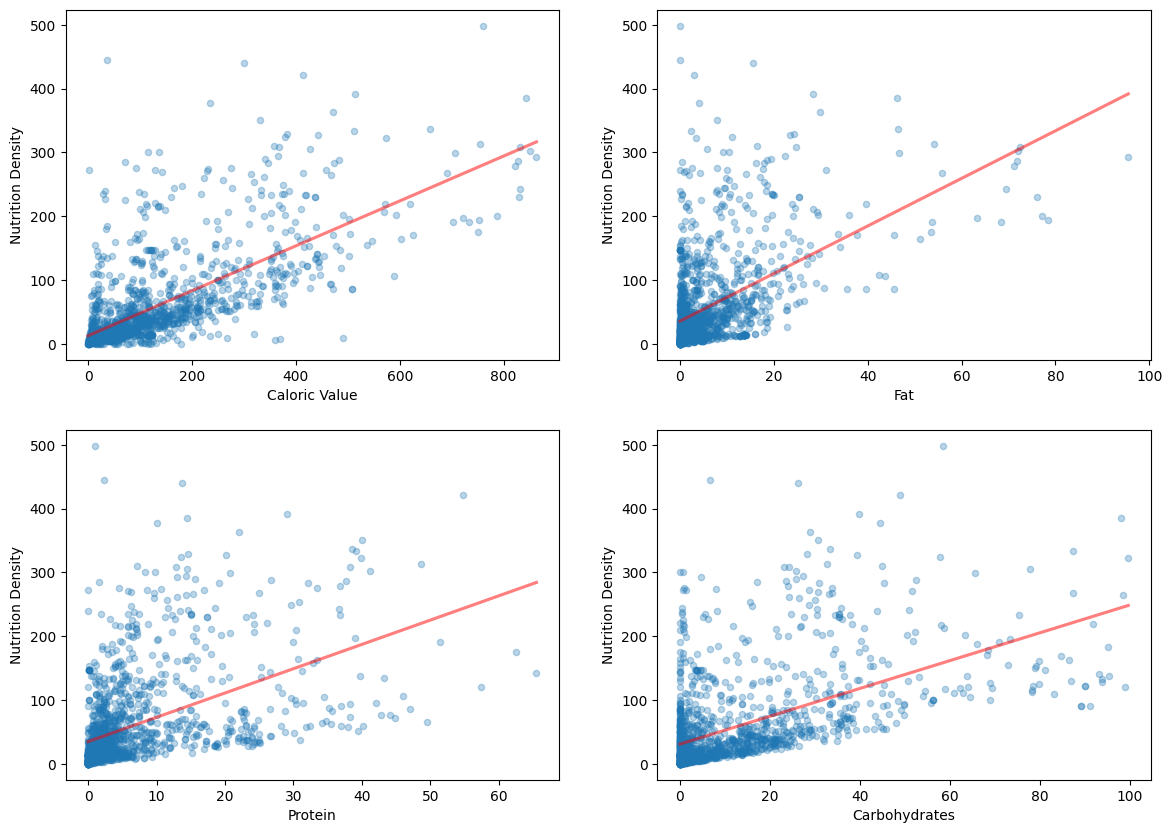

In [24]:
plt.figure(figsize=(14,10))
for i, macro in enumerate(macro_cols):
    plt.subplot(2,2,i+1)
    sns.regplot(data = data, x = macro, y ='Nutrition Density',
                ci = None, scatter_kws = {"s" : 20, "alpha" : 0.3}, 
                line_kws = {"color" : "red", "alpha" : 0.5})
plt.show()

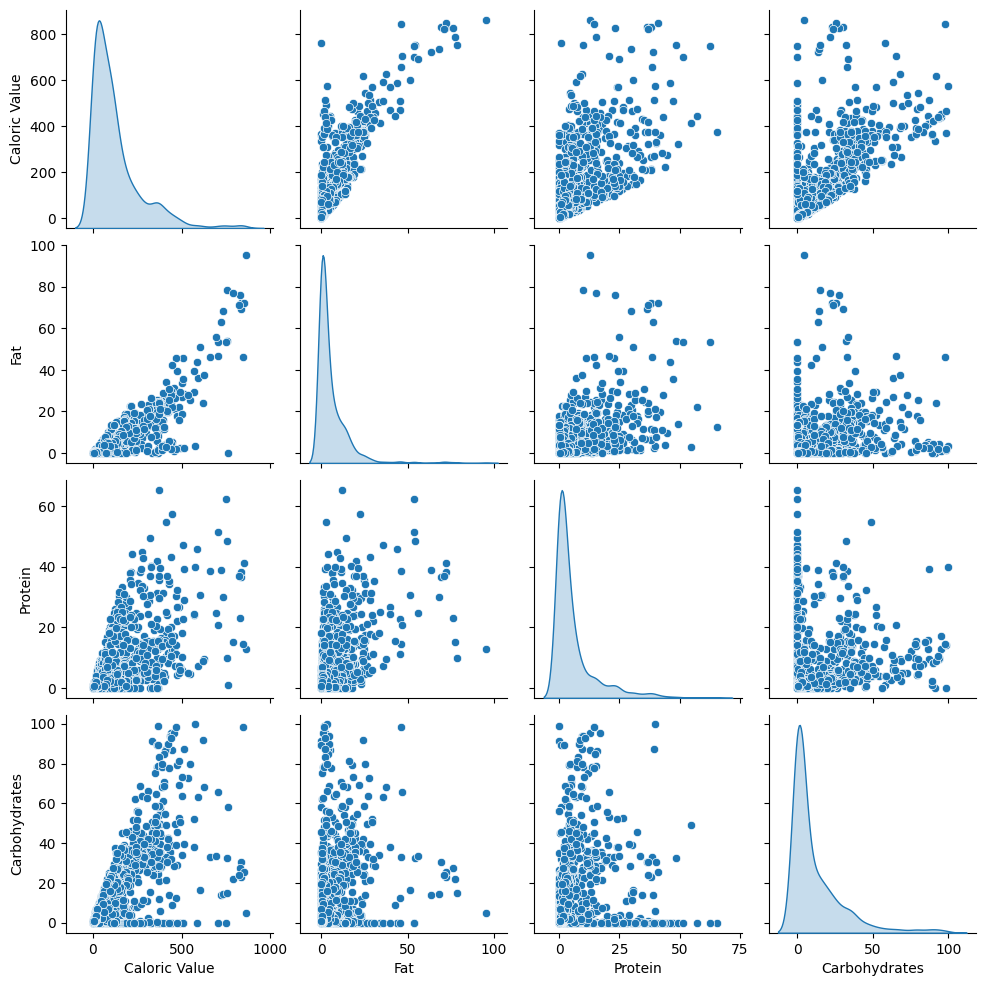

In [25]:
sns.pairplot(macro_data, diag_kind = 'kde')
plt.show()

## Supervised Learning ~ Regression

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import svm

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor


In [80]:
X = data.iloc[:,1:34]
y = data['Nutrition Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
def perform_grid_search_and_evaluate(model ,param_grid, X_train, y_train, X_test, y_test, randomized = False):

    if randomized == True:
            grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, verbose = 1, n_jobs = -1)

    else:
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1, error_score = 'raise')
    
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    
    y_pred = best_estimator.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)

    results = {
        'best_params' : grid_search.best_params_,
        'mean_square_error' : MSE,
    }

    return best_estimator, results

### Simple Linear Regression

In [83]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_pred = linreg_model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 0.002381295073279329


### Ridge Regression Model

In [84]:
param_grid_ridge = {
    'alpha' : [0.01, 0.1, 1, 10, 100]
}

ridge_model, ridge_results = perform_grid_search_and_evaluate(model = Ridge(), param_grid = param_grid_ridge,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test)

for key, value in ridge_results.items():
    print(f'{key} : {value}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits


best_params : {'alpha': 0.01}
mean_square_error : 0.002341270274821918


### Lasso Regression Model

In [85]:
param_grid_lasso = {
    'alpha' : [0.01, 0.1, 1, 10, 100]
}

lasso_model, lasso_results = perform_grid_search_and_evaluate(model = Lasso(), param_grid = param_grid_lasso,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test)

for key, value in lasso_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


best_params : {'alpha': 0.01}
mean_square_error : 0.004264591968999019


## Tree Based Model

### Decision Tree Regressor

In [86]:
param_grid_dtr = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None,'sqrt', 'log2']
}

dtr_model, dtr_results = perform_grid_search_and_evaluate(model = DecisionTreeRegressor(), param_grid = param_grid_dtr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test, randomized = False)

for key, value in dtr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


best_params : {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
mean_square_error : 267.41442529331994


### Random Forest Regressor

In [87]:
param_grid_rfr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rfr_model, rfr_results = perform_grid_search_and_evaluate(model = RandomForestRegressor(), param_grid = param_grid_rfr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)

for key, value in rfr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params : {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'friedman_mse', 'bootstrap': False}
mean_square_error : 222.93799346654566


### AdaBoost Regressor

In [88]:
param_grid_abr = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1, 10],
    'loss': ['linear', 'square', 'exponential']
}

abr_model, abr_results = perform_grid_search_and_evaluate(model = AdaBoostRegressor(), param_grid = param_grid_abr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)

for key, value in abr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best_params : {'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.1}
mean_square_error : 446.01827675955315


### Gradient Boosting Regressor

In [ ]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

gbr_model, gbr_results = perform_grid_search_and_evaluate(model = DecisionTreeRegressor(), param_grid = param_grid_gbr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)

for key, value in gbr_results.items():
    print(f'{key} : {value}')

### XGBoost Regressor

In [90]:
param_grid_xgbreg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 0.1, 0.01]
}

xgbrerg_model, xgbreg_results = perform_grid_search_and_evaluate(model = XGBRegressor(), param_grid = param_grid_xgbreg,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = True)


for key, value in xgbreg_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params : {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
mean_square_error : 56.01652615415644


## Support Vector Machine ~ Regression

In [91]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svr_model, svr_results = perform_grid_search_and_evaluate(model = svm.SVR(), param_grid = param_grid_svr,
                                                              X_train = X_train, y_train =  y_train, X_test = X_test, y_test = y_test,
                                                              randomized = False)

for key, value in svr_results.items():
    print(f'{key} : {value}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best_params : {'C': 100, 'epsilon': 0.01, 'gamma': 0.001}
mean_square_error : 27.985932667508305


## Neural Network

In [ ]:
import torch
import torch.nn as nn 
import torch.optim as optim

from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

import time

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_train = np.array(y_train, dtype = np.float32)
y_test = np.array(y_test, dtype = np.float32)


In [ ]:
X_train_tensor = torch.from_numpy(X_train).squeeze()
y_train_tensor = torch.from_numpy(y_train).squeeze()
X_test_tensor = torch.from_numpy(X_test).squeeze()
y_test_tensor = torch.from_numpy(y_test).squeeze()


In [ ]:
class CustomDataset(Dataset):

    def __init__(self, X, y):
        self.X  = X
        self.y = y

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_data = CustomDataset(X_train_tensor, y_train_tensor)
test_data = CustomDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size = 50, shuffle = True, num_workers = 0)
test_loader = DataLoader(dataset = test_data)

In [ ]:
class fully_connected_nn(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(33, 16)
        self.layer2 = nn.Linear(16,16)
        self.layer3 = nn.Linear(16, 1)       

    def forward(self, x):

        x = x.view(-1, 33)

        out = self.layer1(x)
        out = torch.relu(out)

        out = self.layer2(out)
        out = torch.relu(out)

        out = self.layer3(out)      

        return out

In [ ]:
model_nn = fully_connected_nn()

In [ ]:
optimizer = optim.Adam(model_nn.parameters(), lr = 0.1) 
criterion = nn.MSELoss()

In [ ]:
num_epochs = 200

for epoch in range(num_epochs):

    running_loss = 0
    running_loss_test = 0 
    model_nn.train()

    for batch_data, batch_labels in train_loader:

        optimizer.zero_grad()

        outputs = model_nn(batch_data).squeeze()
        loss = criterion(outputs, batch_labels.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model_nn.eval()

    with torch.no_grad():
        for batch_data_test, batch_labels_test in test_loader:

            test_outputs = model_nn(batch_data_test).squeeze()
            test_loss = criterion(test_outputs, batch_labels_test.float().squeeze())
            running_loss_test += test_loss.item()
                        
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.2f}, Test Loss = {running_loss_test/len(test_loader):.2f}")


Epoch [20/200], Loss: 27.46, Test Loss = 358.83
Epoch [40/200], Loss: 35.60, Test Loss = 164.45
Epoch [60/200], Loss: 4.34, Test Loss = 4.20
Epoch [80/200], Loss: 3.38, Test Loss = 1.32
Epoch [100/200], Loss: 5.78, Test Loss = 8.57
Epoch [120/200], Loss: 12.13, Test Loss = 32.26
Epoch [140/200], Loss: 5.09, Test Loss = 49.63
Epoch [160/200], Loss: 3.95, Test Loss = 100.88
Epoch [180/200], Loss: 15.14, Test Loss = 9.68
Epoch [200/200], Loss: 9.01, Test Loss = 3.30
